# GML - Mini-Challenge 1 - FS 2022

**Ausgabe:** Montag, 21. März 2022  
**Abgabe:** Sonntag, 24. April 2022, bis 24 Uhr 

In dieser Mini-Challenge implementieren und verwenden wir verschiedene Supervised Learning-Methoden und machen Gebrauch von Model Selection-Prinzipien und -Algorithmen.

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln zahlreiche Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss von Anfang bis Ende lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. Nur was korrekt ausführt wird bewertet.
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gehört eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

**Ridge Regression** (siehe beispielsweise James et al., *An Introduction to Statistical Learning*, 2015, pp 215) ist eine regularisierte Form ($l_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die Ridge Regression-Kostenfunktion für einen Datensatz $(x^{(i)}, y^{(i)})$ mit $x^{(i)} = (x_1^{(i)}, \dots , x_p^{(i)})$ von $N$ Datenpunkten ist: 

\begin{equation}
J(\beta) = \sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)^2 + \alpha\sum_{j=1}^{p} \beta_j^2 
\end{equation}

$(\beta_0, \beta_1, \dots, \beta_p)$ sind dabei die Modellkoeffizienten.

Es gilt zu beachten, dass bei Ridge Regression der Achsenabschnitt, i.e. der Modellkoeffizient $\beta_0$ nicht in den Penalty Term der Kostenfunktion eingeht. Das zeigt sich in obiger Gleichung durch die Summe von $i=1$ (nicht $i=0$) bis $p$ (Anzahl Prädiktoren).

Für die Optimierung der Koeffizienten bei gegebenem Datensatz ergeben sich dadurch Implikationen für Gradient Descent und Normalengleichung.  

Wenn man die Input-Variablen standardisiert, was **bei Regularisierung fast immer angezeigt** ist um sämtliche Variablen auf eine vergleichbare Skala (dimensionslose Standardabweichungen) zu bringen, und damit die zugehörigen Koeffizienten in ähnlichem Umfang zu regularisieren, ist es eine Möglichkeit das Optimierungsproblem für $\beta_0$ und die restlichen Variablen zu separieren. $\beta_0$ kann dann nämlich mit $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet werden und ist so unregularisiert. Die Koeffizienten $(\beta_1, \dots, \beta_p)$ werden dann mit Gradient Descent oder Normalengleichen optimiert.

Möchte man alle Modell-Koeffizienten, inklusive $\beta_0$, mittels Gradient Descent optimieren, so gilt es eine Fallunterscheidung bei der Berechnung des Gradienten zu machen für die Gradienten-Komponente $0$, welche zum Koeffizienten $\beta_0$ gehört, und den verbleibenden Gradienten-Komponenten $1$ bis $p$, welche zu den Modellkoeffizienten $(\beta_1, \dots, \beta_p)$ gehören. Dies deswegen, weil $\beta_0$ nicht in die Strafterm-Summe der Kostenfunktion eingeht.

### Zu Gradient Descent für Ridge Regression

Zur Verwendung von Gradient Descent muss der Gradient der Kostenfunktion berechnet werden. Der Gradient $\nabla f(\chi)$ einer Funktion $f(\cdot)$ mehrerer ($m$) Variablen $\chi = (\chi_1, \chi_2, \dots, \chi_m)$ ist gegeben durch:

\begin{equation}
\nabla f(\chi) = \Big( \frac{\partial f(\chi)}{\partial \chi_1}, \frac{\partial f(\chi)}{\partial \chi_2}, \dots, \frac{\partial f(\chi)}{\partial \chi_m}\Big)
\end{equation}

$\frac{\partial f(\chi)}{\partial \chi_i}$ ist dabei die partielle Ableitung von $f(\cdot)$ nach $\chi_i$. $\nabla f(\chi)$ ist also ein $m$-dimensionaler Vektor.   

Bei Standardisierung der Input-Variablen und separater 'Optimierung' von $\beta_0$ wird $\beta_0$ vorab berechnet, wird dann zur Konstanten in der Kostenfunktion, und muss nicht mehr mitoptimiert werden, i.e. kann beim Gradienten aussen vor gelassen werden.

### Zur Normalengleichung für Ridge Regression

Einen Input-Datensatz können wir als $N \times p+1$ Matrix $\mathbf{X}$ schreiben. $p+1$ deswegen, weil wir den $p$ Input-Variablen noch eine Spalte von $1$-en voranstellen können, um den Koeffizienten $\beta_0$ mit berücksichtigen zu können. Sie hat also die Form

\begin{equation}
\mathbf{X} = 
\begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_j & \cdots & x^{(1)}_p \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_j & \cdots & x^{(2)}_p \\
& & \vdots & &\\
1 & x^{(i)}_1 & x^{(i)}_2 & \cdots & x^{(i)}_j & \cdots & x^{(i)}_p \\
& & \vdots & &\\
1 & x^{(n)}_1 & x^{(n)}_2 & \cdots & x^{(n)}_j & \cdots & x^{(n)}_p
\end{bmatrix}
\end{equation}

Gleichermassen können wir unsere Output-Variablen als $N$-dimensionalen Vektor $y = (y^{(1)}, .. y^{(N)})$ betrachten.  

Damit können wir ein lineares Modell in kompakter Schreibweise wie folgt formulieren:  

\begin{equation}
y = \mathbf{X}\beta + \epsilon
\end{equation}

Wobei $\epsilon = (\epsilon_1, \cdots \epsilon_N)$ ein Vektor von irreduzierbaren Fehlern für die $N$ Datenpunkte ist.

Für die **unregularisierte OLS Kostenfunktion kann eine analytische Lösung** gefunden werden, die als Normalengleichung bezeichnet wird:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^Ty
\end{equation}


Gleichermassen kann für die analytische Lösung der **Ridge Regression Kostenfunktion** folgende analytische Lösung hergeleitet werden:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}

Möchten wir alle Modellkoeffizienten, inklusive $\beta_0$, auf einmal optimieren, ist $\mathbf{1}_R$ dabei im Grunde die $(p+1 \times p+1)$-dimensionale Einheitsmatrix. Allerdings muss das Element $(0,0)$ gleich $0$ gesetzt, dies um den Koeffizienten $\beta_0$ nicht zu regularisieren. $\mathbf{1}_R$ ist also:


\begin{equation}
\mathbf{1}_r = 
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 & \cdots & 0 \\
& &  & \ddots &  & \vdots &  \\
& \vdots &  &  & \ddots & 0 & 0 \\
0 & 0 & \cdots &  & 0 & 1 & 0 \\
0 & 0 & \cdots &  &  & 0 & 1
\end{bmatrix}
\end{equation}

**Bei standardisierten Inputdaten** kann alternativ auch der oben erwähnte Weg beschritten werden, bei welchem man $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet, die Spalte von $1$-en $\mathbf{X}$ nicht vorangestellt und schliesslich eine Normalengleichung verwendet wird mit unveränderter $(p \times p)$-dimensionaler Einheitsmatrix $\mathbf{1}$:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1})^{-1} \mathbf{X}^Ty
\end{equation}

Du bist frei in diesem Aufgabenblatt einen beliebigen (korrekten) Weg für Gradient Descent und Normalengleichung zu wählen.

---

**Aufgabe**

Leite für die obige Ridge Regression-Kostenfunktion den Gradienten und die Normalengleichung analytisch her, für den Fall dass die Inputdaten nicht standardisiert seien.  

(Schreibe die Herleitung in LaTex-Notation in die folgende Zelle).  

YOUR ANSWER HERE

Herleitung der Gradienten Ableitung der Ridge Regression-Kostenfunktion:  

Ridge Regression-Kostenfunktion:  

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2 +
\alpha\sum_{j=1}^{p}\beta_{j}^2
\end{equation}

Die partielle Ableitung von $J(\beta)$ nach $\frac{\partial J(\beta)}{\partial J_{\beta k}}$, wobei $\beta_{k}$ für die einzelnen Modelkoeffizienten steht:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
\frac{\partial}{\partial \beta_k} 
\sum_{i=1}^{N} \left(y^{(i)} - \beta_0 \sum_{j=1}^{p} x_j^{(i)} \beta_j\right)^2 +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}


1. Kettenregel:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j\right) \cdot
\frac{\partial}{\partial \beta_k} 
\left(y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j \right) + 
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
(- x_k^{(i)})\right) +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}

2. Summenregel:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(- x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}

3. (-1) von $-x_k^{(i)}$ voranstellen:
\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}


Somit gilt für den Gradienten:

\begin{equation}
\nabla J(\beta) = 
\frac{\partial J(\beta)}{\partial \beta_k} = 
\left( \frac{\partial J(\beta)}{\partial \beta_1},
\frac{\partial J(\beta)}{\partial \beta_2},
\dots,
\frac{\partial J(\beta)}{\partial \beta_p}\right)
\end{equation}

Herleitung der Normalengleichung der Ridge Regression-Kostenfunktion

Ridge Regression-Kostenfunktion:  

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}  

wobei $\beta$ ein vektor mit den gesuchten Koeffizienten ($\beta_1, \beta_2, \dots, \beta_p$) ist.

Für die Herleitung soll die oben erstellte Formel als Ausgangslage dienen:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}

$y^{(i)}$ kann als Vektor und $\beta_0, $ ..  als Matrix dargestellt werden.  

\begin{equation}
Y = \left( \begin{matrix} y^{(1)} \\ y^{(2)} \\ y^{(3)} \\ \vdots \\ y^{(N)} \end{matrix} \right)
\end{equation} 

### Aufgabe 2 (3 Punkte)  

Was würde sich in Aufgabe 1 ändern wenn wir anstelle von Ridge Regression Lasso betrachten würden für Kostenfunktion, Koeffizientenoptimierung und Koeffizienten?

YOUR ANSWER HERE

Die Lasso Regression unterscheidet sich im Strafterm von der Ridge Regression. Anstelle eines quadratischen Strafterm
$\dots +\alpha \sum_{j=1}^{p} \beta_j^2 $ wird bei Lasso Reg. der Strafterm absolut verwendet 
$\dots +\alpha \sum_{j=1}^{p} | \beta_j | $.

Lasso Regression-Kostenfunktion:  

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2 +
\alpha\sum_{j=1}^{p} | \beta_{j}|
\end{equation}

Die partielle Ableitung von $J(\beta)$ nach $\frac{\partial J(\beta)}{\partial J_{\beta k}}$, wobei $\beta_{k}$ für die einzelnen Modelkoeffizienten steht:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
(- x_k^{(i)})\right) +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} |\beta_j|
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(- x_k^{(i)}\right) \right) + \alpha 1
\end{equation}

Die Änderungen zur Lasso Regression bedeuten für die:
1. Kostenfunktion

1. Koeffizientenoptimierung

1. Koeffizienten

### Aufgabe 3 (8 Punkte)

Komplettiere die folgende Klasse so, dass sie bei Wahl der entsprechenden Initialisierungsoption, das Ausführen der `fit`-Methode die Kostenfunktion der Ridge Regression-Kostenfunktion mit Gradient Descent (`gd`) oder der regularisierten Normalengleichung (`neq`) optimiert.

Erstelle nun einen einfachen Datensatz von 1000 Datenpunkten zur Validierung deiner Implementation: Die eindimensionalen x-Werte seien normalverteilt mit Mittelwert 5 und Standardabweichung 3. Die y-Werte seien gegeben durch ein einfaches lineares Modell mit Koeffizienten $\beta_0=-2$ und $\beta_1=3$.

Zeige damit, dass
- deine Implementierung für Gradient Descent erfolgreich konvergiert.
- du mit Normalengleichung und Gradient Descent praktisch die gleiche (korrekte) Lösung findest (verwende dazu `np.testing.assert_array_almost_equal`).
- der Effekt der Regularisierung sich wie erwartet niederschlägt, wenn du die Werte für die Koeffizienten als Funktion er Regularisierungsstärke $\alpha$ über den gesamten sinnvollen Bereich für $\alpha$ zeichnest (Ridge Regression Path). Diskutieren diesen Plot.

YOUR ANSWER HERE

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.base import BaseEstimator

class RidgeRegression(BaseEstimator):
    
    def __init__(self, opt_method='gd', alpha=1., eta=0.01, maxsteps=100, eps=0.00000001):
        '''Implements a Ridge Regression estimator.
        
        Arguments
        ---------
        alpha:      Regularization proportionality factor. Larger values
                    correspond with stronger regularization.
        opt_method: Optimization method to choose for the cost function.
                    Can be either 'gd' (Gradient Descent) or 'neq'.
        maxsteps:   Maximum number of Gradient Descent steps to take.
        eps:        Epsilon, length of gradient to be reached with Gradient
                    Descent.
        eta:        Fixed step lenght to take at each gradient descent
                    iteration.
        '''
        # parameters
        self.alpha = alpha
        self.opt_method = opt_method
        self.maxsteps = maxsteps
        self.eps = eps
        self.eta = eta
        # attributes
        # model coefficients
        self.beta_ = None
        # values of cost function along gradient descent iterations
        self.costs_ = []       
        
    def fit(self,X,y):
        '''        
        '''
        # YOUR CODE HERE
        if opt_method == 'gd':
            pass
            #self.beta_ = 
        if opt_method == 'neq':
            self.beta_ = normalequation(X, y)        
        #raise NotImplementedError()
        return self
        
    def gradient_descent(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using gradient descent.
        '''
        # YOUR CODE HERE
        raise NotImplementedError()
        
    def normalequation(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using the normalequation.
        '''
        # YOUR CODE HERE
        # erstellen der Einheitsmatrix mit p = Anzahl beta und Element (0,0) = 0 setzen (beta_0 nicht regularisiert)
        dim_p = X.shape[1]
        one_R = np.ones((dim_p+1, dim_p+1))
        one_R[0,0] = 0
        # beta Koeffizienten berechnen mit Ridge
        beta = np.linalg.inv(X.T @ X + alpha*one_R) @ X.T @ y
        return beta
    
    @staticmethod
    def gradient(beta,X,y,alpha):
        '''Computes and returns the gradient of the ridge regression cost function.
        '''
        # YOUR CODE HERE
        raise NotImplementedError()
    
    @staticmethod 
    def costfunction(beta,X,y,alpha):
        '''Computes and returns the value of the ridge regression cost function.
        '''
        # YOUR CODE HERE
        y_pred = X @ self.beta_
        raise NotImplementedError()

    
    def predict(self,X):
        '''Computes the predictions of the current model.
        '''
        # YOUR CODE HERE
        if opt_method == 'gd':
            pass
            #y_predicted =         
        if opt_method == 'neq':
            y_predicted = costfunction(self.beta_, X, ) #?
            
        return y_predicted

    
    def score(self,X,y):
        '''Returns R^2 for given input/output data given the model
        coefficients.
        '''
        # YOUR CODE HERE
        # get prediction y
        y_predicted = fit(X, y)
        # calculate R squared with numpy linear algebra
        r2 = 1 - ((y - y_predicted).T @ (y - y_predicted).T / (y - np.average(y).T @ (y - np.average(y))))
        
        return r2
    
    
    @staticmethod
    def approximate_gradient(beta,X,y,alpha,epsilon=0.00001):
        '''Approximates the gradient with finite differences.
        
        You can use this method to check your gradident.
        '''
        grad_approx = []
        cf = RidgeRegression.costfunction
        for i,b in enumerate(beta):
            eps = np.zeros(beta.shape[0])
            eps[i] += epsilon
            print(eps)
            grad_approx.append(
                (cf(beta+eps,X,y,alpha)-cf(beta-eps,X,y,alpha))/(2*epsilon)
            )
        return np.array(grad_approx)
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()

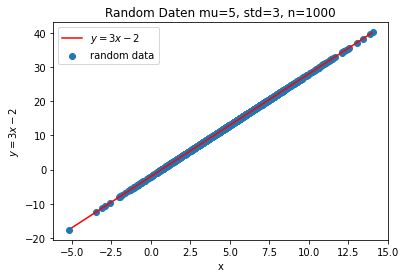

In [51]:
# Datensatz
np.random.seed(41)
mu, sigma, n = 5, 3, 1000
x_rand_data = np.random.normal(mu, sigma, size=n)
X_rand_data = np.hstack((np.ones(len(x_rand_data)).reshape(-1,1), x_rand_data.reshape(-1,1)))
y_rand_data = 3*x_rand_data -2

# data plot
x_line = np.arange(-5, 15, 1)
y_line = 3*x_line -2

plt.plot(x_line, y_line, color='red', label='$y = 3x - 2$')
plt.scatter(x_rand_data, y_rand_data, label='random data')
plt.title(f'Random Daten mu={mu}, std={sigma}, n={n}')
plt.xlabel('x'), plt.ylabel('$y = 3x - 2$')
plt.legend()
plt.show()

### Aufgabe 4 (7 Punkte)

Schreibe nun eine Funktion, die einen Contour Plot der Kostenfunktion erstellt (siehe dazu gml Aufgabenblatt 1 im Trainingcenter). Zeichne den Pfad von Gradient Descent durch die Koeffizientenebene ein (dazu musst du die obige Klasse modifizieren) und untersuche und vergleiche den Plot für

- unterschiedliche Regularisierungsstärken, inkl. ohne Regularisierung.
- mit und ohne Standardisierung der Input-Daten.

Diskutiere deine Einsichten.

In [1]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

YOUR ANSWER HERE

### Aufgabe 5 (4 Punkte)

Lade den Datensatz `data/moto.csv` und verschaffe dir einen Überblick durch explorative Datenanalyse. Unser Ziel wird es sein, den Preis (`price`) der Motorräder vorherzusagen unter Verwendung der übrigen Attribute. Teile deine Überlegungen zu diesem Problem.  

Unterteile den Datensatz nun noch in Trainings- und Testdaten (80:20) für die weiteren Aufgaben.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 6 (3 Punkte)

Erstelle ein erstes einfaches lineares Modell für `price`, bloss mit der einen Input-Variablen `displacement`.  

Untersuche für die unregularisierte OLS-Lösung die Modell-Annahmen eines linearen Modells. Schau dir dazu *Kapitel 4 - Residuenanalyse* im Skript von Werner Stahel an, wenn du Anleitung möchtest.    

Nimm, falls sinnvoll, Variablen-Transformationen vor, um dein Modell zu verbessern und untersuche den Effekt. Erkläre dein Vorgehen.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 7 (4 Punkte)

Entwickle nun dein bestes Ridge-Regression-Modell im Sinne von $R^2$ auf dem Trainingsdatensatz. Du darfst durch Feature-Transformation beliebige weitere Attribute hinzufügen. Gebe $R^2$ und MAE auf dem Testdatensatz an.

Zur Optimierung der Hyperparameter kannst du scikit-learn-Funktionalität verwenden.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 8 (4 Punkte)

Erstelle einen Plot bei welchem du auf der x-Achse die Regularisierungsstärke $\alpha$ und auf der y-Achse $R^2$ für Trainings- und Testdaten (zwei Kurven) zeichnest. Diskutiere den Plot hinsichtlich Bias-Variance Trade-Off und der Verallgemeinerungsfähigkeit des Modells.  

Was ziehst du daraus für Schlüsse für weitere Modellierungsschritte?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 9 (10 Punkte)

Was ist das beste Modell für die Output-Variable `price` im Sinne von $R^2$, das du ohne Einschränkungen finden kannst?

Vergleiche dazu mindestens drei weitere Ansätze miteinander.

Wie verändert sich die Situation wenn du für den *Mean Absolute Error* (MAE) optimierst?

Hierzu kannst du scikit-learn Funktionalität verwenden.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 10 (4 Punkte)

Stelle nun die Resultate der bisherigen Aufgaben und Modelle tabellarisch und graphisch übersichtlich dar und diskutiere sie.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 11 (8 Punkte)

Nun betrachten wir noch dein bestes Modell etwas vertieft. Trainiere diesen Modell-Ansatz auf jeweils $[\frac{1}{10}, \frac{2}{10}, \frac{3}{10}, .., \frac{10}{10}]$ der Trainingsdaten. Erstelle nun einen Plot bei welchem der Wert der Kostenfunktion für die Trainings- und Testdaten auf der y-Achse und der Trainingsdatenanteil auf der x-Achse liegen möge. Zeichne also zwei Kurven in dieses Koordinatensystem.

Schau dir dazu das Video von [Kilian Weinberger zu Model Selection](https://www.youtube.com/watch?v=a7cofmFgwIk&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=22) an.  

Interpretiere und diskutiere nun deine Einsichten zu Model Selection, Bias & Variance und Grösse des Datensatzes.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE